# Introduction

About Tasty Bytes: Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted inspiration so we decided to provide it. We started life as a search engine for recipes, helping people to find ways to use up the limited supplies they had at home. Now, over two years on, we are a fully fledged business. For a monthly subscription we will put together a full meal plan to ensure you and your family are getting a healthy, balanced diet whatever your budget. Subscribe to our premium plan and we will also deliver the ingredients to your door.


## Questions to answer

The team have noticed that if they display a popular recipe on the homepage, the traffic of the website goes up by up to 40% which leads to more subscriptions. Therefore the company would like a data scientist to:

- Predict which recipes will lead to high traffic.
- Correctly predict high traffic recipes 80% of the time.
- Make recommendations for next steps.

## Information on data
The product manager has tried to make this easier for us and provided data for each recipe, as well as whether there was high traffic when the recipe was featured on the home page. As you will see, they haven’t given us all of the information they have about each recipe. 

- recipe: Numeric, unique identifier of recipe
- calories: Numeric, number of calories 
- carbohydrate: Numeric, amount of carbohydrates in grams 
- sugar: Numeric, amount of sugar in grams 
- protein: Numeric, amount of protein in grams 
- category: Character, type of recipe. Recipes are listed in one of ten possible groupings ('Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal') 
- servings: Numeric, number of servings for the recipe 
- high_traffic: Character, if the traffic to the site was high when this recipe was added 

In [1]:
#Read in the data file provided for this exercise

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('recipe_site_traffic_2212.csv')
print(data)

     recipe  calories  carbohydrate  sugar  protein      category servings  \
0         1       NaN           NaN    NaN      NaN          Pork        6   
1         2     35.48         38.56   0.66     0.92        Potato        4   
2         3    914.28         42.68   3.09     2.88     Breakfast        1   
3         4     97.03         30.56  38.63     0.02     Beverages        4   
4         5     27.05          1.85   0.80     0.53     Beverages        4   
..      ...       ...           ...    ...      ...           ...      ...   
942     943   1161.00          5.31  22.39    44.22  Lunch/Snacks        2   
943     944       NaN           NaN    NaN      NaN        Potato        2   
944     945    951.74         29.42   3.57    13.87          Pork        2   
945     946    266.61         35.77   0.97     8.07        Potato        6   
946     947    184.56         45.21   6.20     0.03     Beverages        4   

    high_traffic  
0           High  
1           High  
2     

In [2]:
#Let's explore the dataset in more detail

print(data.info())
print(data.isna().sum())

#The dataframe is composed of 8 columns with 947 rows of 3 different data types.
#Immediately we can see there are missing values in 5 of the columns therefore this data needs to be cleaned before advancing.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None
recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


5% of the total data is: 47.35
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64
count    947.000000
mean       3.477297
std        1.732741
min        1.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        6.000000
Name: servings, dtype: float64


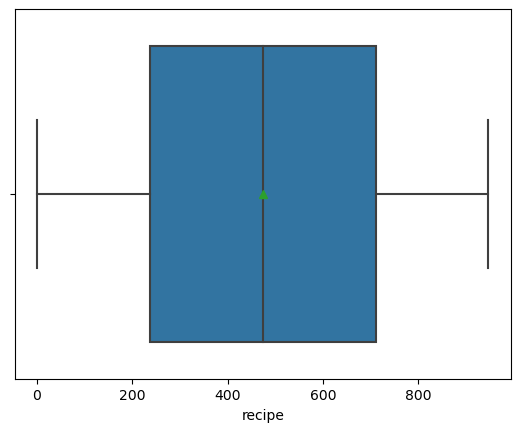

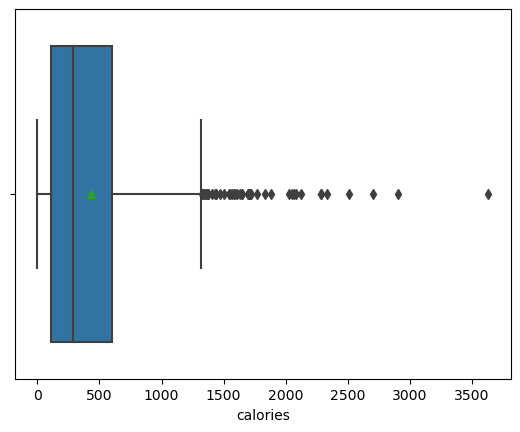

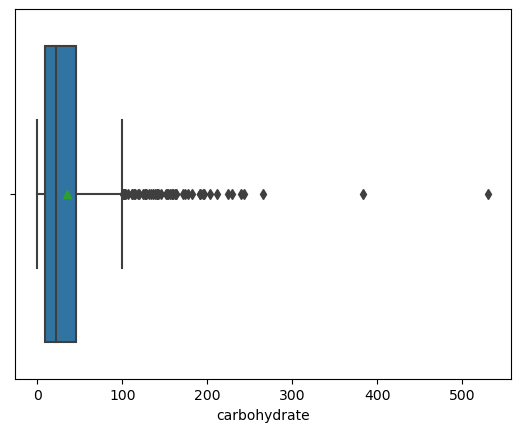

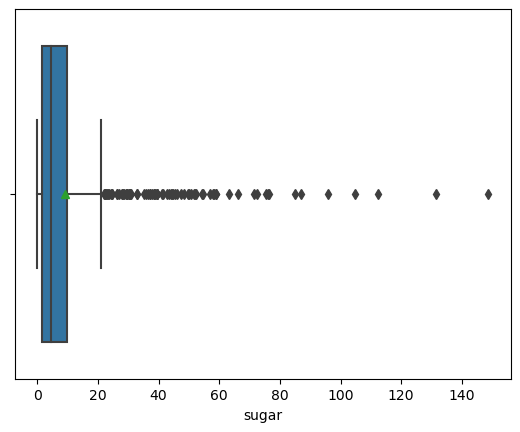

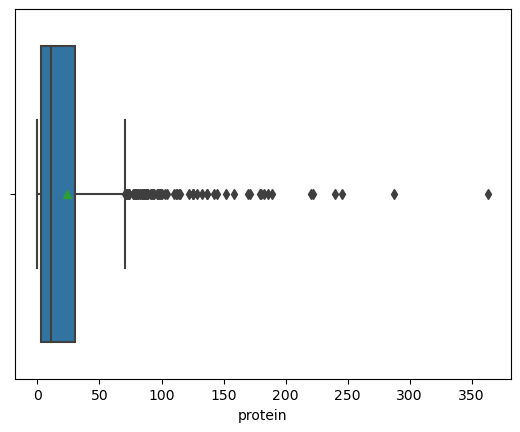

C:\Users\VictoriaBegley\AppData\Local\Temp\ipykernel_40764\388866211.py:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())              #No correlation


                recipe  calories  carbohydrate     sugar   protein  servings
recipe        1.000000  0.012920      0.044743 -0.027489 -0.058767  0.029660
calories      0.012920  1.000000     -0.028970 -0.097302  0.172477 -0.034756
carbohydrate  0.044743 -0.028970      1.000000  0.073922 -0.042795 -0.017895
sugar        -0.027489 -0.097302      0.073922  1.000000 -0.099053 -0.008617
protein      -0.058767  0.172477     -0.042795 -0.099053  1.000000 -0.017926
servings      0.029660 -0.034756     -0.017895 -0.008617 -0.017926  1.000000


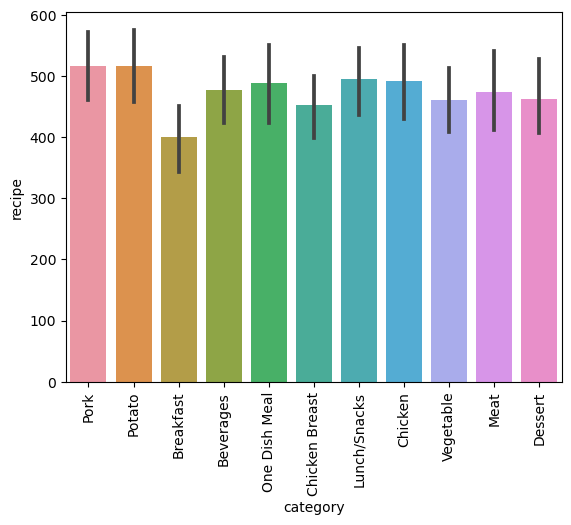

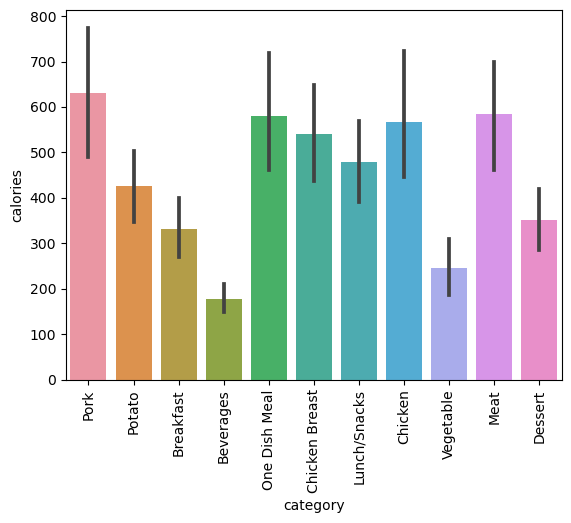

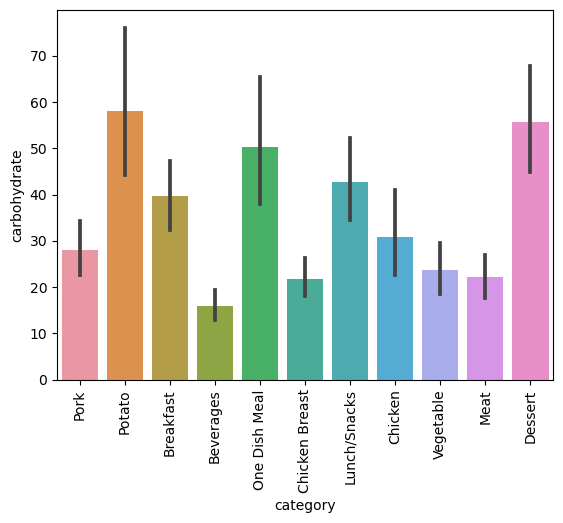

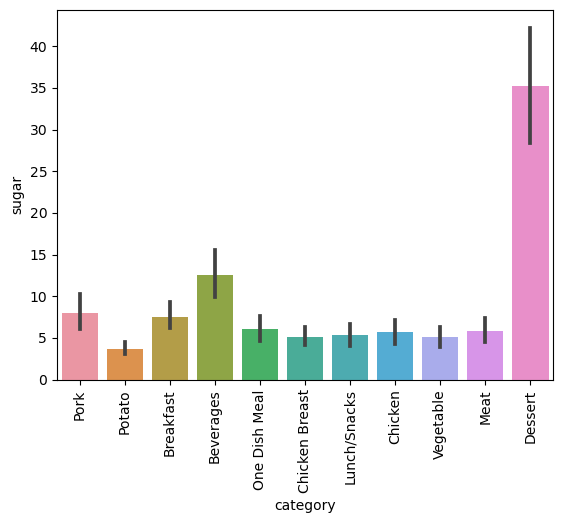

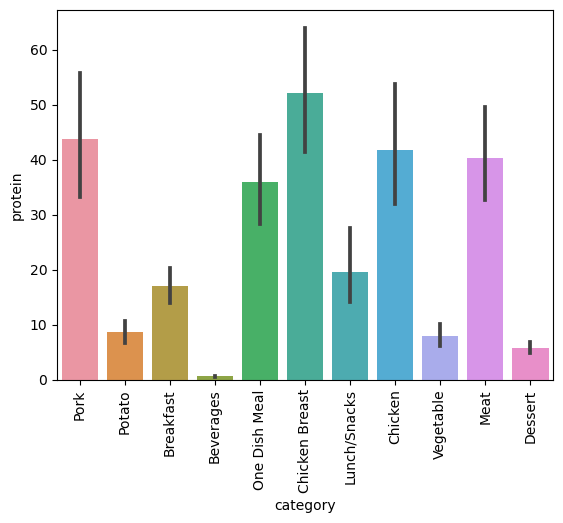

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int32  
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 55.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      947 non-null    float64 
 2   carbohydrate  947 non-null    float64 
 3   sugar         947 non-null    float64 
 4   protein       9

In [3]:
# I will go through each column to validate the data

##Recipe: looks as it should and it is the numeric identifier so no cleaning needed.

##calories, carbohydrate, sugar and protein: 52 missing values. Decide how to impute

threshold = len(data) * 0.05    #if missing data is lower than 5% of total data, then drop, if not impute with mean/median
print("5% of the total data is:", threshold)   

#Explore relationship with other variables before deciding how to impute the mean (should we group by category or serving amount?)

#First check out category:

print(data['category'].value_counts())  #Looks correct, no need to clean. 

#Servings: datatype incorrect, change to integer

df = data.copy() #creating a copy of the data before manipulating it

print(df['servings'].value_counts()) 

df['servings'] = df['servings'].str.replace(' as a snack', '') #remove as a snack comment from some values
df['servings'] = df['servings'].astype('int')
print(df['servings'].describe()) #data now looks as expected

#Let's look at the data and check for correlations or significant differences for food category.

for i in range(5):             #Should impute median since there are many outliers
    col_index = i  
    col = df.columns[col_index]
    sns.boxplot(x=col, data=df, showmeans=True)
    plt.show()   

print(df.corr())              #No correlation

for i in range(5):            #Should impute median grouped by category as we can see variability among groups
    col_index = i  
    col = df.columns[col_index]
    sns.barplot(x='category', y=col, data=df)
    plt.xticks(rotation=90)
    plt.show()

    
#Imputing median by each category

cols=['calories','carbohydrate','sugar','protein']


for col in cols:
    df[col].fillna(df.groupby('category')[col].transform('median'), inplace=True)
    
print(df.info())

#High traffic has many missing values. According to the description provided, I believe the NAs are 'low' traffic.
# Convert all NAs to 'Low'

df['high_traffic'] = np.where(df['high_traffic'] == 'High', 'High', 'Low')

#Change both category and high_traffic to category type

df['category'] = df['category'].astype('category')
df['high_traffic'] = df['high_traffic'].astype('category')

print(df.info())

print(df.duplicated().sum()) #no duplicates

## Data validation

This data set began with 8 columns with 947 rows of 3 different data types. After cleaning we obtained the same amount of rows and columns with data types as described in data information provided.

- recipe: numeric recipe identifier. No cleaning needed.
- calories: numeric with 52 missing values. Imputed median grouped by food category.
- carbohydrate: numeric with 52 missing values. Imputed median grouped by food category.
- sugar: numeric with 52 missing values. Imputed median grouped by food category.
- protein: numeric with 52 missing values. Imputed median grouped by food category.
- category: category type data with 11 possible categories. Data as described, no cleaning needed. Convert to category type.
- servings: 3 values with strings. Removed string and converted column to numeric type.
- high_traffic: 373 missing values changed to 'low' as per description of the data. Convert to category type.

## Exploratory Analysis

I have investigated the features contained in this dataset to try to understand what makes a recipe popular and lead to high traffic.

I first observed a difference in the number of recipes from each category with breakfast being the category with the most recipes available and one dish meal the category with least amount of dishes available. When I separated these out by the high traffic feature I could see patterns emerging: it was very clear that potato, pork and vegetable dishes created high traffic most of the time whilst beverages generate low traffic most of the time.

<h3 style="text-align: center;"> Count of Recipes per Category and Traffic Status </h3>
<img src="countplot_category_traffic.png" alt="Count of Recipes per Category and Traffic Status" width="500" height="500">


Next I observed that there were double the amount of recipes with a serving size of 4 available in this dataset. When I seperated these out by the high traffic feature, I could see that for all servings there more recipes with high traffic, and this differences was bigger for 4 and 6 serving sizes.

<h3 style="text-align: center;"> Count of Recipes per Serving Size and Traffic Status </h3>
<img src="countplot_servings_traffic.png" alt="Count of Recipes per Serving Size and Traffic Status" width="500" height="500">

Next I observed the distribution of calories, carbohydrates, sugar and protein is skewed to the left. This should be corrected using a log transformation for machine learning activies.

<h3 style="text-align: center;">Distribution of Calories, Carbohydrates, Sugar and Protein Measures</h3>
<img src="histogram_2x2.png" alt="Histogram of Calories, Carbohydrates, Sugar and Protein" width="500" height="500">
<h3 style="text-align: center;">Distribution of Calories, Carbohydrates, Sugar and Protein Measures (log transformed)</h3>
<img src="log_histogram_2x2.png" alt="Log Histogram of Calories, Carbohydrates, Sugar and Protein" width="500" height="500">

The average number of calories, carbohydrates, sugar and protein by category is as one might expect for the different kinds of food: meat dishes have the most calories and beverages the least. Potato and dessert dishes have the most carbohydrates and beverages the least. Desserts have by far the most sugar in their recipes. The meat dishes contain the most protein and beverages contain the least protein.

<h3 style="text-align: center;"> Average Number of Calories/carbohydrates/Sugar/Protein by Category </h3>
<img src="2x2_barplot_category_.png" alt="Barplots by category" width="500" height="500">

In the plot below we can see that we have more recipes corresponding to high traffic (574) than low (373), so we have about 1.5 times more representation of high traffic recipes than low. We need to take into account this imbalance when choosing which model to persue.

<h3 style="text-align: center;"> Recipe Number by Traffic Status </h3>
<img src="traffic.png" alt="Recipe Number by Traffic Status" width="500" height="500">

Finally, I checked whether we could see any correlations within the numeric variables of our data.

<h3 style="text-align: center;"> Heatmap of Numeric Features </h3>
<img src="heatmap.png" alt="Heatmap of Numeric Features" width="500" height="500">

Since I could not see any correlations, I replotted the heatmap after transforming the categorical variable food category to numbers using one hot encoding. However, the only correlation I could find was between grams of sugar and desserts which was not very informative.

<h3 style="text-align: center;"> Heatmap of All Explanatory Features </h3>
<img src="heatmap2.png" alt="Heatmap of All Explanatory Features" width="500" height="500">

I conclude that no particular feature can explain whether a recipe would be considered high or low traffic although the food category and serving size were more informative than the other features.

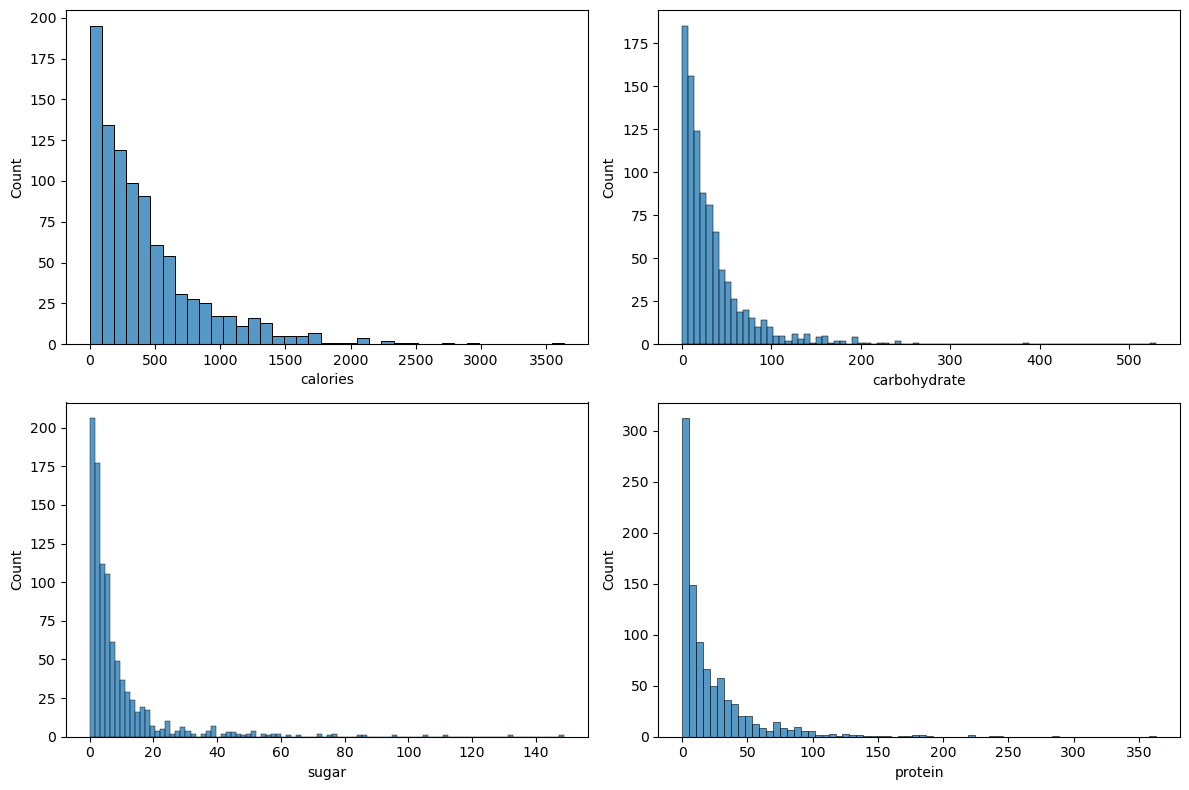

In [4]:
#Plot histograms of the features to assess skewness. 
# These features are heavily skewed to the left, so will need to be transformed.

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: calories
sns.histplot(x='calories', data=df, ax=axs[0,0])


# Plot 2: carbohydrate
sns.histplot(x='carbohydrate', data=df, ax=axs[0,1])


# Plot 3: sugar
sns.histplot(x='sugar', data=df, ax=axs[1,0])


# Plot 4: Protein
sns.histplot(x='protein', data=df, ax=axs[1,1])
plt.tight_layout()
plt.savefig('histogram_2x2.png',dpi=300, bbox_inches="tight")
plt.show()

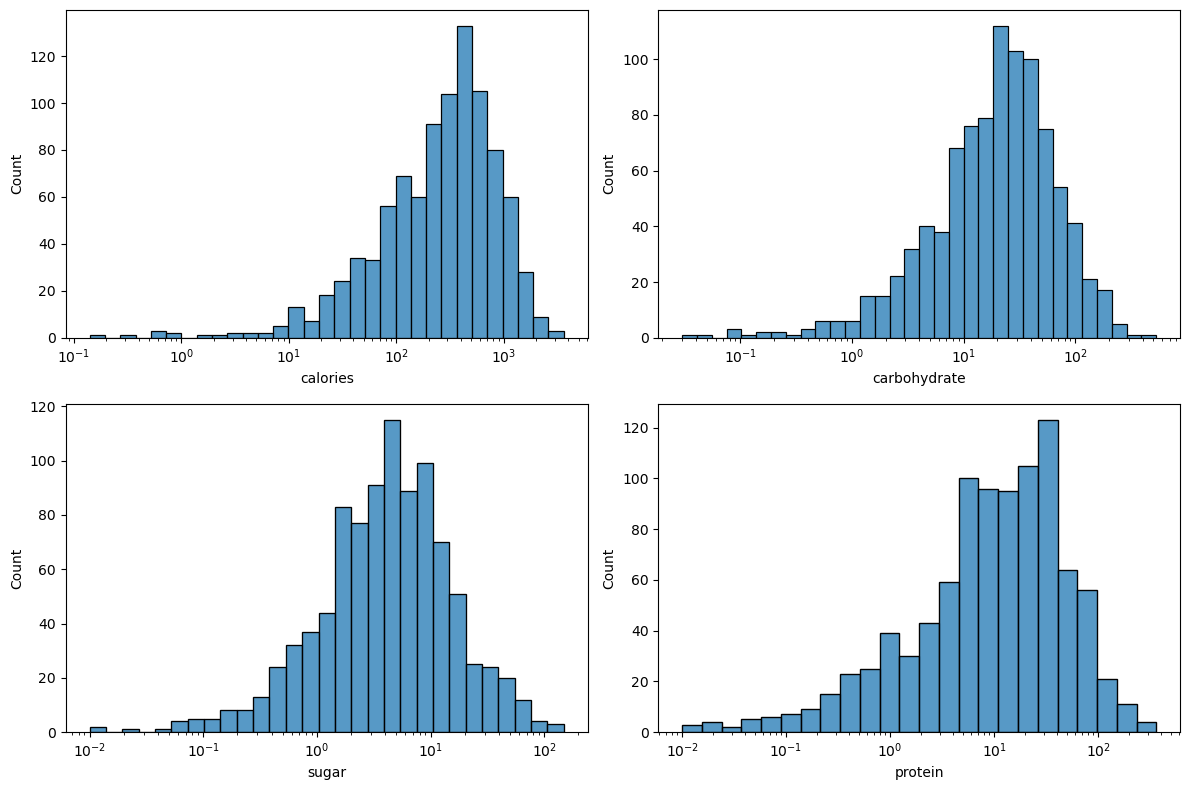

In [5]:
# log transform the above graph

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: calories
sns.histplot(x='calories', data=df,log_scale=True ,ax=axs[0,0])


# Plot 2: carbohydrate
sns.histplot(x='carbohydrate', data=df, log_scale=True, ax=axs[0,1])


# Plot 3: sugar
sns.histplot(x='sugar', data=df,log_scale=True, ax=axs[1,0])


# Plot 4: Protein
df_filtered = df[df['protein'] > 0]
sns.histplot(x='protein', data=df_filtered,log_scale=True, ax=axs[1,1])
plt.tight_layout()
plt.savefig('log_histogram_2x2.png',dpi=300, bbox_inches="tight")
plt.show()

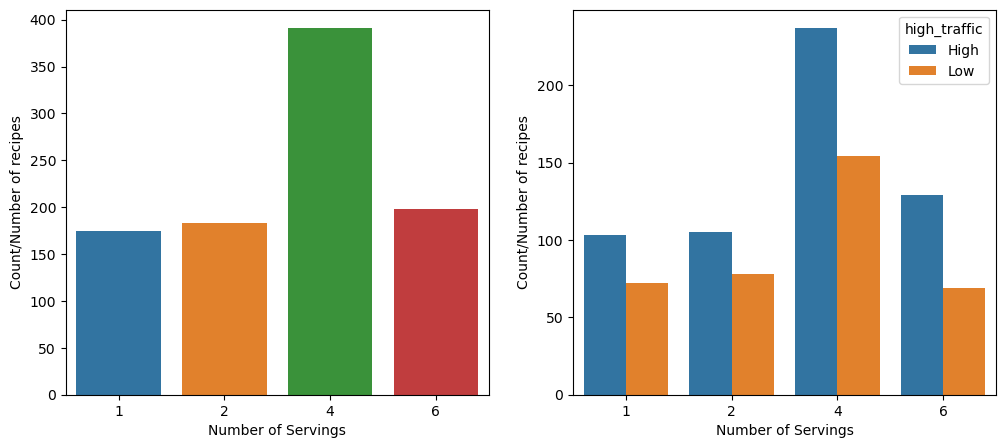

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ax = sns.countplot(x='servings', data=df, ax=axs[0]) #recipes with 4 servings seem to be more popular
ax.set(xlabel='Number of Servings', ylabel='Count/Number of recipes')

ax = sns.countplot(x='servings', hue='high_traffic', data=df, ax=axs[1]) #recipes with 4 and 6 servings have higher proportion of high traffic recipes
ax.set(xlabel='Number of Servings', ylabel='Count/Number of recipes')
plt.savefig('countplot_servings_traffic.png',dpi=300, bbox_inches="tight")
plt.show()

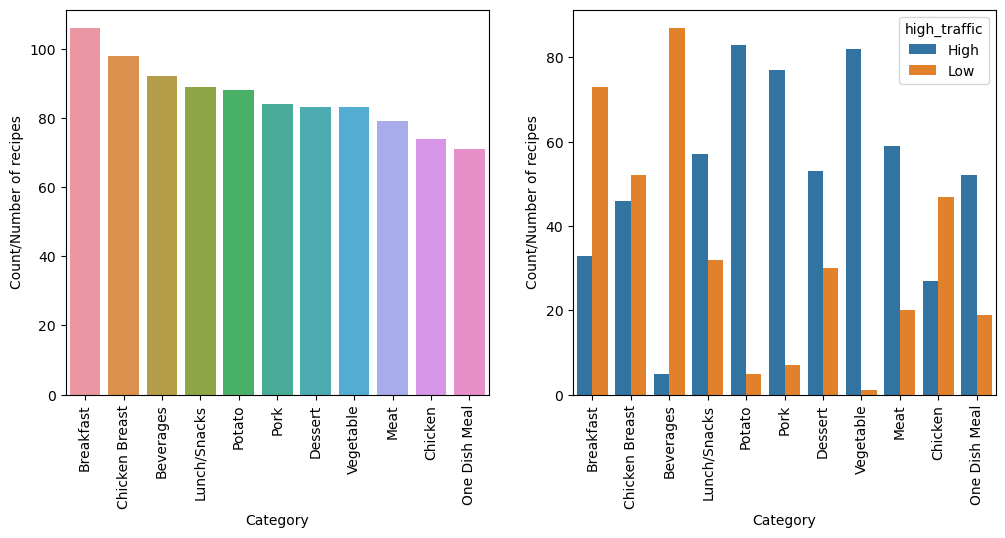

In [7]:
#Plot number of recipes per category
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ax1 =sns.countplot(x='category', data=df, order=df['category'].value_counts().index, ax=axs[0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)  
ax1.set(xlabel='Category', ylabel='Count/Number of recipes')

#Seperate out high and low traffic recipes.Potato, Pork and Vegetable dishes generate high traffic 
## most of the time whilst beverages generate low traffic
ax2 =sns.countplot(x='category', data=df, hue='high_traffic', order=df['category'].value_counts().index, ax=axs[1])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)  
ax2.set(xlabel='Category', ylabel='Count/Number of recipes')
plt.savefig('countplot_category_traffic.png',dpi=300, bbox_inches="tight")
plt.show()

CategoricalIndex(['Pork', 'Meat', 'One Dish Meal', 'Chicken', 'Chicken Breast',
                  'Lunch/Snacks', 'Potato', 'Dessert', 'Breakfast',
                  'Vegetable', 'Beverages'],
                 categories=['Beverages', 'Breakfast', 'Chicken', 'Chicken Breast', ..., 'One Dish Meal', 'Pork', 'Potato', 'Vegetable'], ordered=False, dtype='category', name='category')


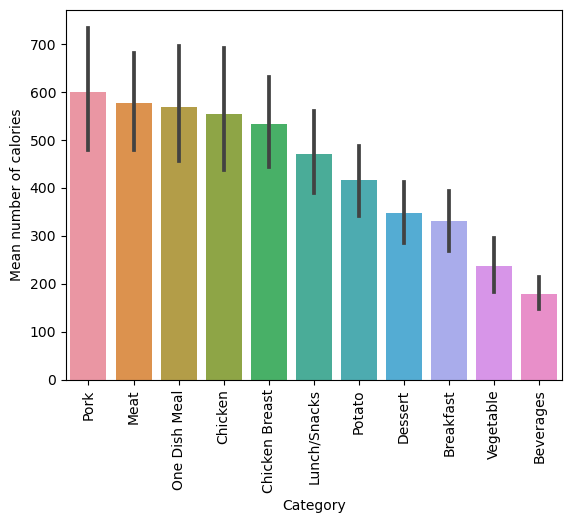

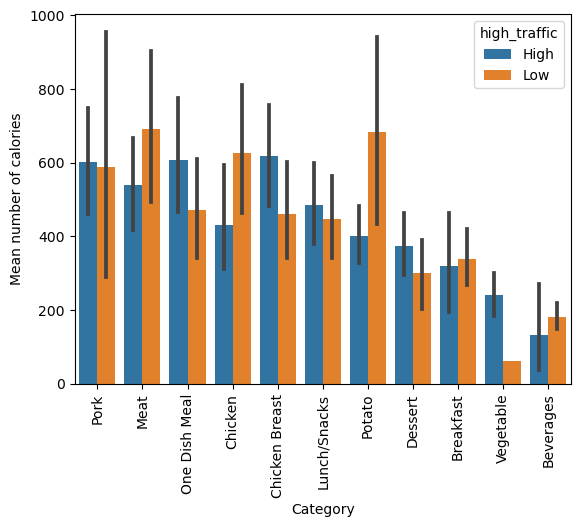

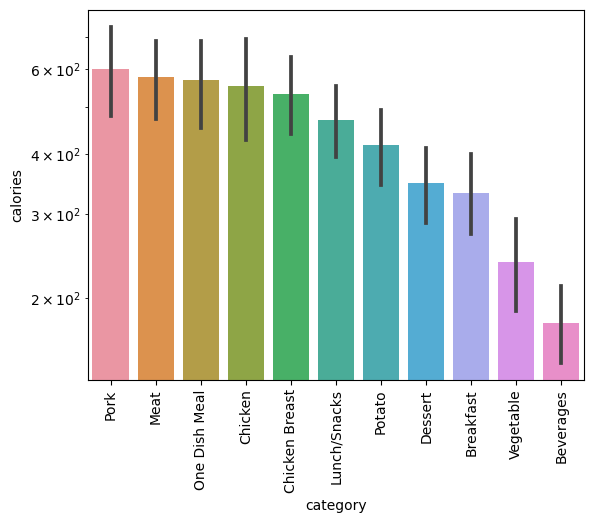

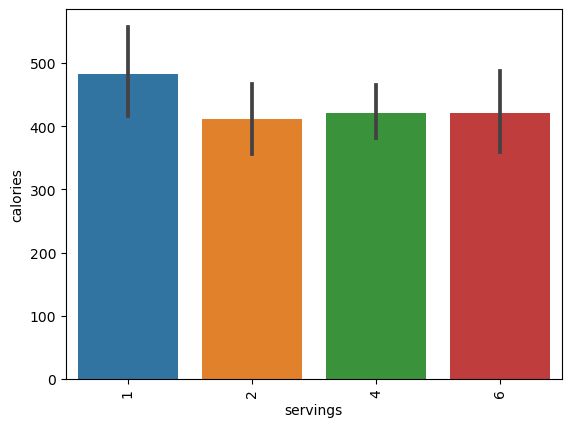

   servings  total_calories
0         1       84638.515
1         2       75381.295
2         4      164703.730
3         6       83486.720


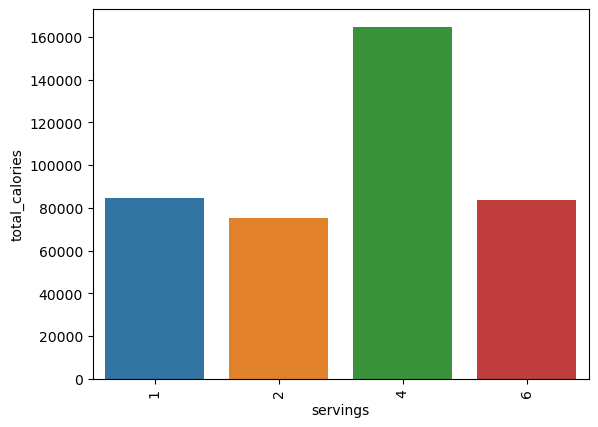

In [8]:
#Compare calories

order = df.groupby('category')['calories'].mean().sort_values(ascending=False).index
print(order)

ax = sns.barplot(x='category', y='calories', data=df, order=order)
plt.xticks(rotation=90)  
ax.set(xlabel='Category', ylabel='Mean number of calories')
plt.savefig('barplot_calories_category.png',dpi=300, bbox_inches="tight")
plt.show()

ax = sns.barplot(x='category', y='calories', hue='high_traffic', data=df, order=order) #doesn't make sense to do this
plt.xticks(rotation=90)  
ax.set(xlabel='Category', ylabel='Mean number of calories')
plt.show()

sns.barplot(x='category', y='calories', data=df, order=order) 
plt.yscale('log')  # Set logarithmic scale for y-axis
plt.xticks(rotation=90)  
plt.show()    #No need to use log scale for these comparisons. 

sns.barplot(x='servings', y='calories', data=df)
plt.xticks(rotation=90)  
plt.show()

#Calculate total calories per serving size    ## same info as count of recipes per serving size
total_calories_by_servings = df.groupby('servings')['calories'].sum().reset_index()
total_calories_by_servings.rename(columns={'calories': 'total_calories'}, inplace=True)
print(total_calories_by_servings)

sns.barplot(x='servings', y='total_calories', data=total_calories_by_servings)
plt.xticks(rotation=90)  
plt.show()

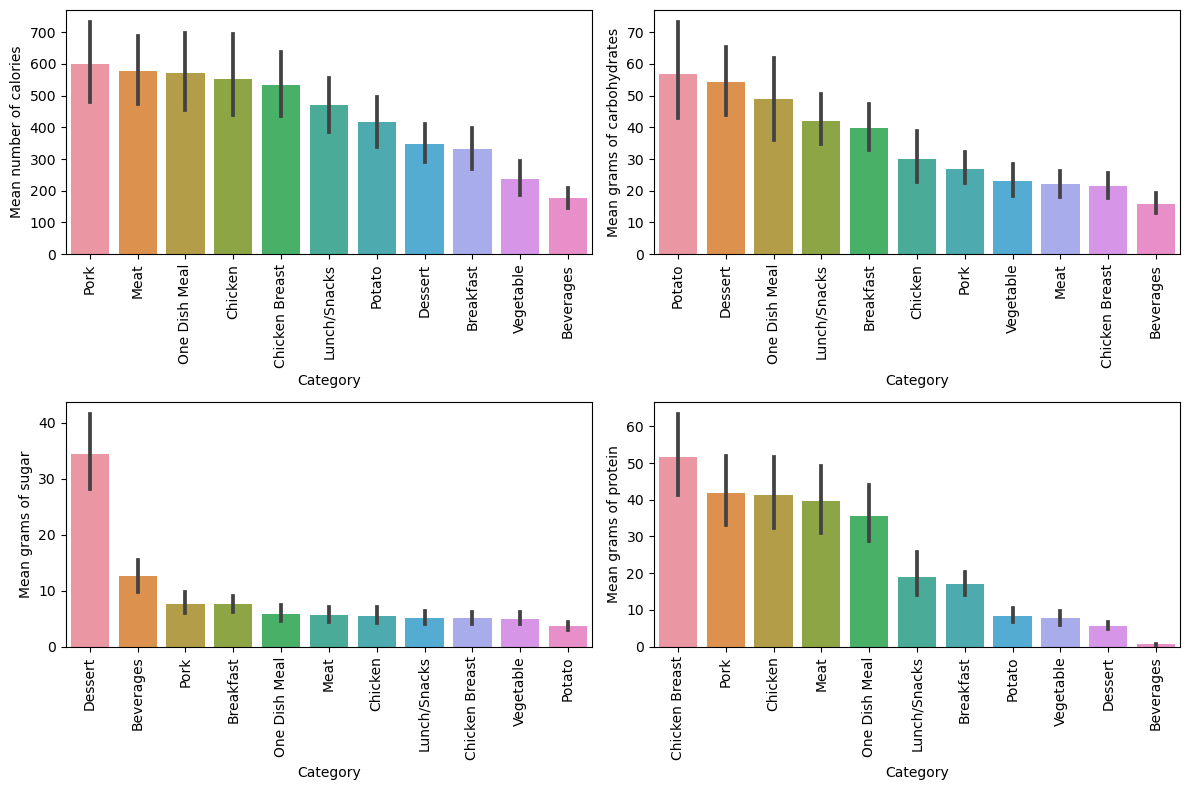

In [9]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: calories
order_calories = df.groupby('category')['calories'].mean().sort_values(ascending=False).index
ax1 = sns.barplot(x='category', y='calories', data=df, ax=axs[0,0], order=order_calories)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)  
ax1.set(xlabel='Category', ylabel='Mean number of calories')

# Plot 2: carbohydrate
order_carbohydrate = df.groupby('category')['carbohydrate'].mean().sort_values(ascending=False).index
ax2 = sns.barplot(x='category', y='carbohydrate', data=df, ax=axs[0,1], order=order_carbohydrate)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)  
ax2.set(xlabel='Category', ylabel='Mean grams of carbohydrates')

# Plot 3: sugar
order_sugar = df.groupby('category')['sugar'].mean().sort_values(ascending=False).index
ax3 = sns.barplot(x='category', y='sugar', data=df, ax=axs[1,0], order=order_sugar)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)  
ax3.set(xlabel='Category', ylabel='Mean grams of sugar')

# Plot 4: protein
order_protein = df.groupby('category')['protein'].mean().sort_values(ascending=False).index
ax4 = sns.barplot(x='category', y='protein', data=df, ax=axs[1,1], order=order_protein)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)  
ax4.set(xlabel='Category', ylabel='Mean grams of protein')

plt.tight_layout()
plt.savefig('2x2_barplot_category_.png', dpi=300, bbox_inches="tight")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   recipe          947 non-null    int64   
 1   calories        947 non-null    float64 
 2   carbohydrate    947 non-null    float64 
 3   sugar           947 non-null    float64 
 4   protein         947 non-null    float64 
 5   servings        947 non-null    int32   
 6   high_traffic    947 non-null    category
 7   Breakfast       947 non-null    uint8   
 8   Chicken         947 non-null    uint8   
 9   Chicken Breast  947 non-null    uint8   
 10  Dessert         947 non-null    uint8   
 11  Lunch/Snacks    947 non-null    uint8   
 12  Meat            947 non-null    uint8   
 13  One Dish Meal   947 non-null    uint8   
 14  Pork            947 non-null    uint8   
 15  Potato          947 non-null    uint8   
 16  Vegetable       947 non-null    uint8   
dtypes: category(1), 

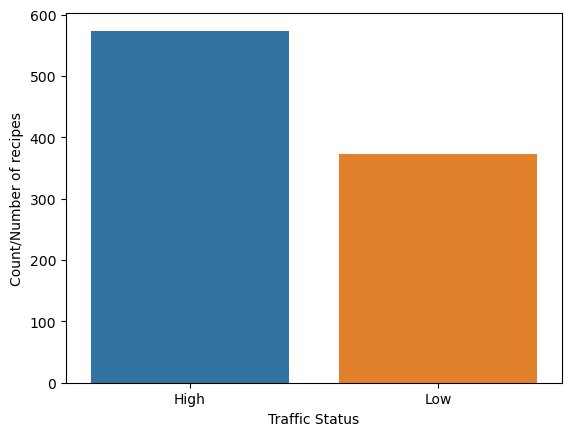

high_traffic  high_traffic
High          High            574
              Low               0
Low           Low             373
              High              0
Name: high_traffic, dtype: int64


C:\Users\VictoriaBegley\AppData\Local\Temp\ipykernel_40764\1354746517.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)  #No correlations observed


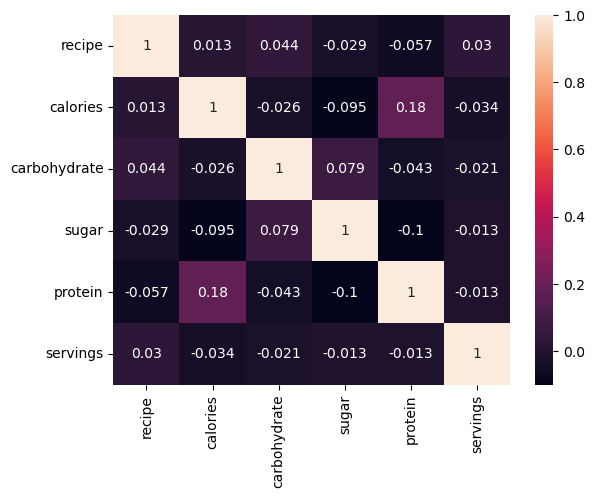

C:\Users\VictoriaBegley\AppData\Local\Temp\ipykernel_40764\1354746517.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_dummies.corr(), annot=True) #correlation between sugar and desserts


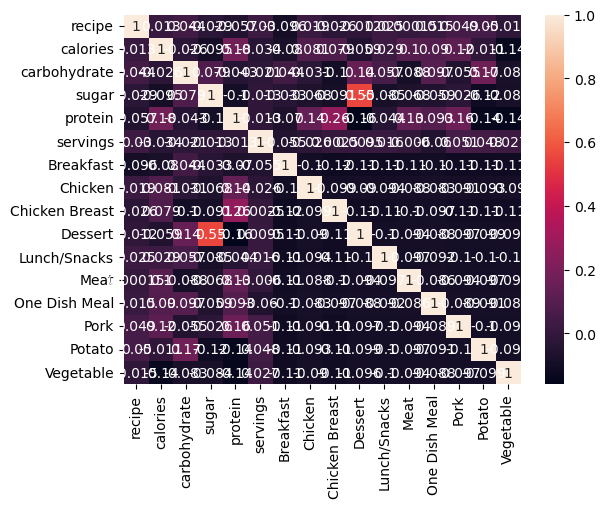

In [10]:
#Find any correlations.
##In order to do this we need to dummy encode the category feature

category_dummy = pd.get_dummies(df['category'], drop_first=True)
df_dummies = pd.concat([df, category_dummy], axis=1)
df_dummies = df_dummies.drop('category', axis=1)

print(df_dummies.info())

ax = sns.countplot(x='high_traffic', data=df_dummies)
ax.set(xlabel='Traffic Status', ylabel='Count/Number of recipes')
plt.savefig('traffic.png',dpi=300, bbox_inches="tight")
plt.show()

print(df.groupby('high_traffic')['high_traffic'].value_counts())

sns.heatmap(df.corr(), annot=True)  #No correlations observed
plt.savefig('heatmap.png',dpi=300, bbox_inches="tight")
plt.show()

sns.heatmap(df_dummies.corr(), annot=True) #correlation between sugar and desserts
plt.savefig('heatmap2.png',dpi=300, bbox_inches="tight")
plt.show()

## Model Fitting & Evaluation

Predicting whether the recipes are popular and lead to high traffic is a binary classification problem in machine learning. As a starter model I am choosing K neighbours classifier to calculate the probability of the target variable being low or high. I am choosing this model because there is a imbalance in the number of high and low recipes to train the model on, with there being 1.5 times more high traffic recipes than low, and there are no linear relationships between the features. The comparison model I am choosing is Decision Tree Classifier or Random Forest classifier because they perform well on imbalanced data and they are easy to interpret with independence from outliers.

For the evaluation, I am choosing to use the f1-score which is a harmonic mean of precision (the proportion of postivie predictiosn that are actually positive) and recall (the proportion of actual positive cases that are correctly identified). To ensure only high traffic recipes are posted on the homepage we need to avoid false positives (posting a low traffic recipe on the page by mistake). I will also monitor the overall accuracy of the models to see how well they perform in general.

## Prepare Data for Modelling

To enable modelling, I first transformed the categorical variable 'category' into numeric features using one hot encoding. I then separated out the target variable (high traffic) from the rest of the dataset. I split the data into a training and test set and scaled the data.

In [11]:

#Define X and y

X = df_dummies.drop('high_traffic', axis=1)
y = df_dummies['high_traffic'].values


#Pull out train and test data sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

#Scale data and perform Knn. Accuracy is 0.74 which is decent but we need to get it to 0.8

from sklearn.preprocessing import PowerTransformer #To scale skewed data
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

steps = [('scaler', PowerTransformer()),
         ('knn', KNeighborsClassifier(n_neighbors = 6))]
pipeline = Pipeline(steps)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

        High       0.74      0.89      0.81       118
         Low       0.73      0.50      0.60        72

    accuracy                           0.74       190
   macro avg       0.74      0.69      0.70       190
weighted avg       0.74      0.74      0.73       190



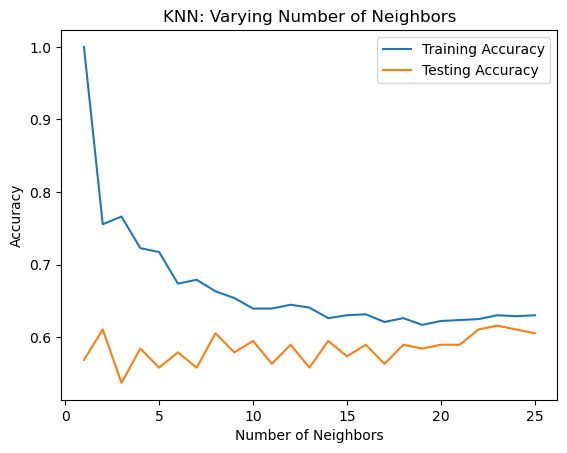

In [12]:
#Determine best number of neighbor to use for KNN

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors:
    knn =  KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

#Plot

plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.title("KNN: Varying Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

#I chose 22 neighbors since it was the first number where training and testing accuracy were closest.

In [13]:
steps = [('scaler', PowerTransformer()),
         ('knn', KNeighborsClassifier(n_neighbors = 22))]  #Changing neighbor improved number slightly (0.77) but not above 0.8
pipeline = Pipeline(steps)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.80      0.86      0.82       118
         Low       0.73      0.64      0.68        72

    accuracy                           0.77       190
   macro avg       0.76      0.75      0.75       190
weighted avg       0.77      0.77      0.77       190



              precision    recall  f1-score   support

        High       0.74      0.83      0.78       118
         Low       0.66      0.53      0.58        72

    accuracy                           0.72       190
   macro avg       0.70      0.68      0.68       190
weighted avg       0.71      0.72      0.71       190

              precision    recall  f1-score   support

        High       0.79      0.85      0.82       118
         Low       0.71      0.62      0.67        72

    accuracy                           0.76       190
   macro avg       0.75      0.74      0.74       190
weighted avg       0.76      0.76      0.76       190



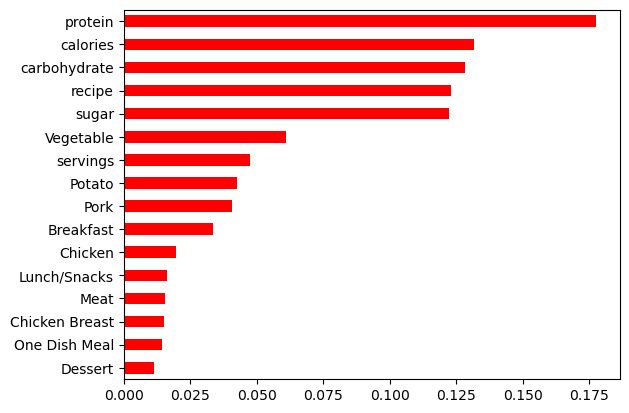

In [14]:
#Change model to Decision Tree Classifier or Random Forest Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

steps = [('scaler', PowerTransformer()),
         ('dt', DecisionTreeClassifier(class_weight='balanced', random_state = 42))]  
pipeline = Pipeline(steps)

dt_scaled = pipeline.fit(X_train, y_train)
y_pred = dt_scaled.predict(X_test)
print(classification_report(y_test, y_pred)) #DecisionTree did not yield better results than Knn

steps = [('scaler', PowerTransformer()),
         ('rf', RandomForestClassifier(class_weight='balanced', random_state = 42))]  
pipeline = Pipeline(steps)

rf_scaled = pipeline.fit(X_train, y_train)
y_pred = rf_scaled.predict(X_test)
print(classification_report(y_test, y_pred))

rf = pipeline.named_steps['rf']
importances_rf = pd.Series(rf.feature_importances_, index= X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='red')
plt.show()

# Protein is the biggest contributor to the model

In [15]:
#Hyperparameter tuning RandomForest

from sklearn.model_selection import GridSearchCV

steps = [('scaler', PowerTransformer()),
         ('rf', RandomForestClassifier(class_weight='balanced', random_state = 42))]  
pipeline = Pipeline(steps)

params_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [2, 4 , 6],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}


grid_rf = GridSearchCV(pipeline,
                       param_grid = params_rf,
                       cv= 3,
                       scoring = 'f1',
                       verbose=1, 
                       n_jobs=-1) 
grid_rf.fit(X_train, y_train) 

best_params = grid_rf.best_params_
print('Best hyperparameters:\n', best_params)

y_pred = grid_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\VictoriaBegley\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best hyperparameters:
 {'rf__max_depth': 2, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
              precision    recall  f1-score   support

        High       0.86      0.75      0.80       118
         Low       0.66      0.81      0.73        72

    accuracy                           0.77       190
   macro avg       0.76      0.78      0.76       190
weighted avg       0.79      0.77      0.77       190



In [16]:
#Try Voting classifier to improve outcomes 

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

scaler = PowerTransformer()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)
        
knn = KNeighborsClassifier(n_neighbors = 22)
dt = DecisionTreeClassifier(class_weight='balanced', random_state = 42)
rf = RandomForestClassifier(class_weight = 'balanced', max_depth = 2, min_samples_leaf = 1, 
                            min_samples_split = 2, n_estimators = 100, random_state = 42)


classifiers = [('K Nearest Neighbor', knn), ('Decision Tree', dt), ('Random Forest', rf)]

for clf_name, clf in classifiers:
    clf.fit(X_train_scale, y_train)
    y_pred = clf.predict(X_test_scale)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
    
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train_scale, y_train)
y_pred = vc.predict(X_test_scale)
vc_accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier:', vc_accuracy)
print(classification_report(y_test, y_pred))

K Nearest Neighbor : 0.774
Decision Tree : 0.716
Random Forest : 0.758
Voting Classifier: 0.7842105263157895
              precision    recall  f1-score   support

        High       0.82      0.83      0.83       118
         Low       0.72      0.71      0.71        72

    accuracy                           0.78       190
   macro avg       0.77      0.77      0.77       190
weighted avg       0.78      0.78      0.78       190



## Results

The k-nearest neighbor model gave decent results with a f1-score of 82% for recipes classed as high and 68% for recipes classed as low. The model performs better for the high class than the low class, which is most likely due to the fact that the training data is imbalanced with more high recipes than low.
         
I next tested the decision tree classifier model which performed worse than the k-nearest neighbor model, so I tried the random forest classifier model. Without tuning, the model performed the same as the k-nearest neighbor model. After hyperparameter tuning to improve f1-score, the model gave an f1-score of 80% for recipes classed as high and 73% for those classed as low. Thus the random forest model was better at correctly classifying recipes labelled as low than the k-nearest neighbor model. This is good since we want to avoid adding a low traffic recipe by mistake onto the homepage.

However, I was not able to increase accuracy beyond 77%. I even tried the ensemble method voting classifier but only improved slightly on the previous models with an f1-score of 83% for high traffic recipes and 71% for low traffic, and an accuracy score of 78%. Therefore, I decided to stick with the random forest classifier model as it is easier to understand than the ensemble method.

In summary and to answer your questions:

1. Can your team predict which recipes will lead to high traffic? 
Yes, with an accuracy of 77%, meaning that 23% of the time the model will choose incorrectly.

2. Correctly predict high traffic recipes 80% of the time?
Yes, with both k-nearest neighbor and random forest models we obained at least an 80% f1-score for high traffic recipes which is a balanced measure of both precision (false positives) and recall (false negatives).

## Business Metrics

Since currently the company chooses the recipe to display on its homepage totally at random, I would recommend using the tuned random forest classifier model to predict if a new recipe will lead to high or low traffic.

At random, the probability of choosing a high traffic recipe will be 50% since there are only 2 possible outcomes (high or low traffic). This model will improve on that by 27%.

The key difference between the two models lies in their accuracy in predicting low-traffic recipes. While the k-nearest neighbor model excels at identifying high traffic recipes, it's more prone to misclassifying low traffic recipes as high traffic. The random forest classifier, on the other hand, is more reliable in this regard. As a result, the random forest model has a 5% higher chance of displaying truly high traffic recipes.

## Recommendations

To have the highest chance of predicting which recipe will lead to high traffic, I recommend deploying the random forest classifier model into production. By implementing this model, we will correctly predict which recipe will lead to high traffic 77% of the time, with most of the failed predictions being high traffic recipes classified as low traffic. 

I recommend the following steps to ensure the model works well and is improved regularly:

- Conduct A/B testing against random selection to evaluate the models performance in reality.
- Test the model for a few months and determine the outcome (did the recipes selected lead to high or low traffic?)
- Add additional features to the current data like date to account of seasonal trends, recipe ingredients, dietry restrictions, etc.
- Measure other metrics like number of clicks on the website, time spent on the website, number of subscriptions.